1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


3470.240450900271


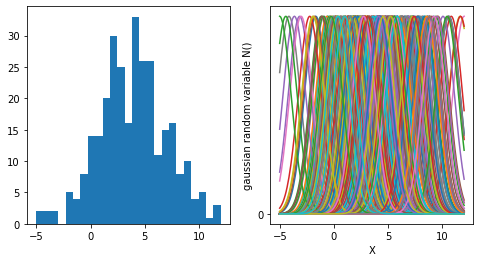

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy as sp
from scipy import stats
from scipy import integrate

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
N = 300
mean = 2
std_dev = 3
#x = mean * np.array(np.random.randn(N)) + std_dev
x = np.random.normal(loc=mean, scale=std_dev, size=N) + mean

y = ax1.hist(x, bins = 25, range = None, histtype='bar', align='mid')
plt.xlabel('X')
plt.ylabel('gaussian random variable N()')
y = range(math.floor(min(x)), math.ceil(max(x))+1)
plt.yticks(ticks = y)

###Plotting Gaussians
val = 1.06*std_dev*N**(-1/5)
x_1 = np.linspace(x.min() - 3*val, x.max() + 3*val, 2000)


#######
ds = 1.06*x.std()*x.size**(-1/5)
xs = np.linspace(x.min(), x.max(), 200)
l_gauss = []

for i in x:
    gau = stats.norm.pdf(xs,i,ds)
    ax2.plot(xs,gau)
    l_gauss.append(gau)
    
gau_sum = np.sum(l_gauss, axis = 0)
integral0 = integrate.trapz(y)
integral1 = integrate.trapz(gau_sum)



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-12-20 17:54:25--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2020-12-20 17:54:26--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce4f991706bf4ab2706d3209aa5.dl.dropboxusercontent.com/cd/0/inline/BFd7AUaujo_3eAatVS4ylBGQ3yuY55_vT_sHom9ro6lWw12SboEfH5QwJ1ijEKjnhrdMWeKatHMt00sBxxLIa1z4s02vha9qooloMkp-4iAsXw/file# [following]
--2020-12-20 17:54:26--  https://uce4f991706bf4ab2706d3209aa5.dl.dropboxusercontent.com/cd/0/inline/BFd7AUaujo_3eAatVS4ylBGQ3yuY55_vT_sHom9ro6lWw12SboEfH5QwJ1ijEKjnhrdMWeKa

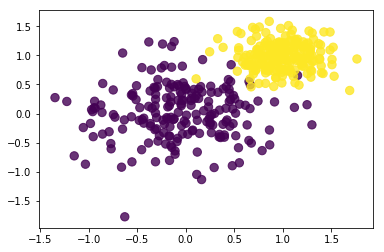

In [19]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

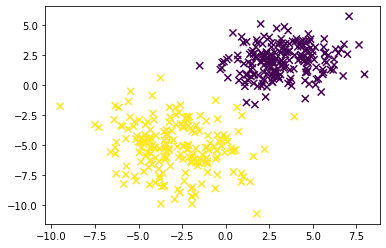

In [20]:
var1 = np.array([-3., -5.])
var2 = np.array([3.2, 2])
std_1 = np.array([[5., 0],[0, 4.]])
std_2 = np.array([[2.7, 0.3], [0.3, 1.9]])

###
X_1 = np.random.multivariate_normal(var1,std_1, 200)
c1 = np.ones((200, 1))
X_1 = np.hstack((X_1,c1))

X_2 = np.random.multivariate_normal(var2, std_2, 200)
c2 = np.zeros((200,1))
X_2 = np.hstack((X_2, c2))
X = np.concatenate((X_1,X_2))

diag, var = plt.subplots()
var.scatter( X[:,0], X[:,1], c = X[:,2], marker = 'x', s = 50)
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [21]:
!wget "https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy"

--2020-12-20 17:54:39--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2020-12-20 17:54:40--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdcac5a8b96f25258e6f4252ec4.dl.dropboxusercontent.com/cd/0/inline/BFfVH2GOdArZwN4ZwRiNY4cA8LMRJ7IYy-LiRPwLLcAgWtcGGitX92S_bx9VC4Rzk4_FI_67AS2ecHArl4c4mEZ1X91MA0vtgWchu0kUFvMrdw/file# [following]
--2020-12-20 17:54:40--  https://ucdcac5a8b96f25258e6f4252ec4.dl.dropboxusercontent.com/cd/0/inline/BFfVH2GOdArZwN4ZwRiNY4cA8LMRJ7IYy-LiRPwLLcAgWtcGGitX92S_bx9VC4Rzk4_FI_67AS2ecHArl4c4mEZ1X91MA0vtgWchu0kUFvMrdw/fil

LinregressResult(slope=0.04009230696406973, intercept=-1.0082379394879784, rvalue=0.056597511872424025, pvalue=2.295857625392191e-09, stderr=0.006704076121902541) 

x: [ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]
y: [-160.85       -139.52       -110.65        -94.395       -83.056
  -62.81333333  -50.93511111  -30.7737      -11.15483432   -0.22014169]
error_y: [0.         0.         0.         1.775      2.94965399 3.30725801
 2.98414404 4.69114976 4.04018885 0.78257307]


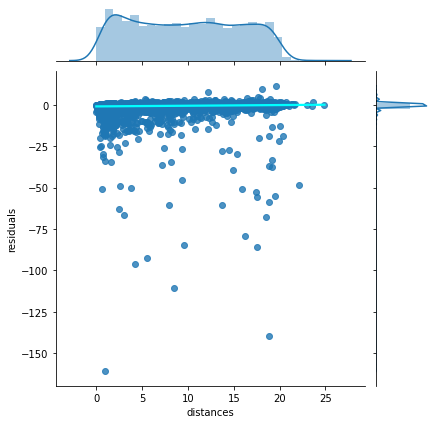

In [23]:
import pandas as pd
from scipy import stats
import seaborn as sns

data = np.load('residuals_261.npy', allow_pickle = True)
df = pd.DataFrame(data.item())
df

x_1 = df.distances
y_1 = df.residuals

print(sp.stats.linregress(x_1,y_1), "\n")

plot = sns.jointplot(x_1,y_1, kind = "reg", joint_kws ={'line_kws':{'color':'cyan'}})

a,binE,var= stats.binned_statistic(x_1,x_1,'count',10,range = (0,20))
binc = 0.5*(binE[1:]+binE[:-1])
x = np.array(binc)
y, bin_Ed1, nbin1 = stats.binned_statistic(y_1,y_1,'mean',10)
ery,bin_Ed2, nbin2 = stats.binned_statistic(y_1,y_1,'std', 10)

print("x:",x)
print("y:",y)
print("error_y:",ery)

In [24]:
df = df.loc[abs(df['residuals']) < 2]
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1
